# Downloading the required libraries and uploading the dataset into dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file dialog for you to upload files

Saving Flight_Price_Dataset_of_Bangladesh.csv to Flight_Price_Dataset_of_Bangladesh.csv


# Dataset Analysis  

Naming the columns of the dataframe appropriately and analysing the dataset using info and head functions.
Also, finding if there are any null or incorrect values in dataset.  
As seen from the below output, no Null values are to be seen.  


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Flight_Price_Dataset_of_Bangladesh.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Flight_Price_Dataset_of_Bangladesh.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None # Set df to None to indicate failure

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)
total_missing = null_counts.sum()
print(f"\nTotal number of missing values: {total_missing}")

Airline                  0
Source                   0
Source Name              0
Destination              0
Destination Name         0
Departure Date & Time    0
Arrival Date & Time      0
Duration (hrs)           0
Stopovers                0
Aircraft Type            0
Class                    0
Booking Source           0
Base Fare (BDT)          0
Tax & Surcharge (BDT)    0
Total Fare (BDT)         0
Seasonality              0
Days Before Departure    0
dtype: int64

Total number of missing values: 0


# Exploratory Data Analysis  


Plotting the histogram, bar plot, correlation plot and box charts to understand more about the data.  

In [ ]:
columns = ['Airline','Source','Destination','Stopovers', 'Aircraft Type', 'Class', 'Booking Source', 'Seasonality']

for column in columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}")

Unique values for Airline: ['Malaysian Airlines' 'Cathay Pacific' 'British Airways'
 'Singapore Airlines' 'IndiGo' 'US-Bangla Airlines' 'AirAsia'
 'Etihad Airways' 'Gulf Air' 'Emirates' 'Biman Bangladesh Airlines'
 'NovoAir' 'FlyDubai' 'Saudia' 'Thai Airways' 'Kuwait Airways' 'Air India'
 'Air Astra' 'Qatar Airways' 'Air Arabia' 'SriLankan Airlines' 'Vistara'
 'Lufthansa' 'Turkish Airlines']
Unique values for Source: ['CXB' 'BZL' 'ZYL' 'RJH' 'SPD' 'JSR' 'DAC' 'CGP']
Unique values for Destination: ['CCU' 'CGP' 'KUL' 'DAC' 'YYZ' 'SPD' 'BZL' 'LHR' 'DEL' 'ZYL' 'RJH' 'JSR'
 'CXB' 'IST' 'DXB' 'SIN' 'BKK' 'DOH' 'JFK' 'JED']
Unique values for Stopovers: ['Direct' '1 Stop' '2 Stops']
Unique values for Aircraft Type: ['Airbus A320' 'Boeing 787' 'Airbus A350' 'Boeing 777' 'Boeing 737']
Unique values for Class: ['Economy' 'First Class' 'Business']
Unique values for Booking Source: ['Online Website' 'Travel Agency' 'Direct Booking']
Unique values for Seasonality: ['Regular' 'Winter Holidays' 'Eid' 

In [ ]:
import pandas as pd

# Assuming your dataframe is named 'df' and already loaded

df['Total Fare (BDT)'] = df['Total Fare (BDT)'].round().astype(int)
df['Total Fare (BDT)']


,Total Fare (BDT)
0,26301
1,11805
2,51865
3,4636
4,74130
...,...
56995,93971
56996,224492
56997,4575
56998,53039


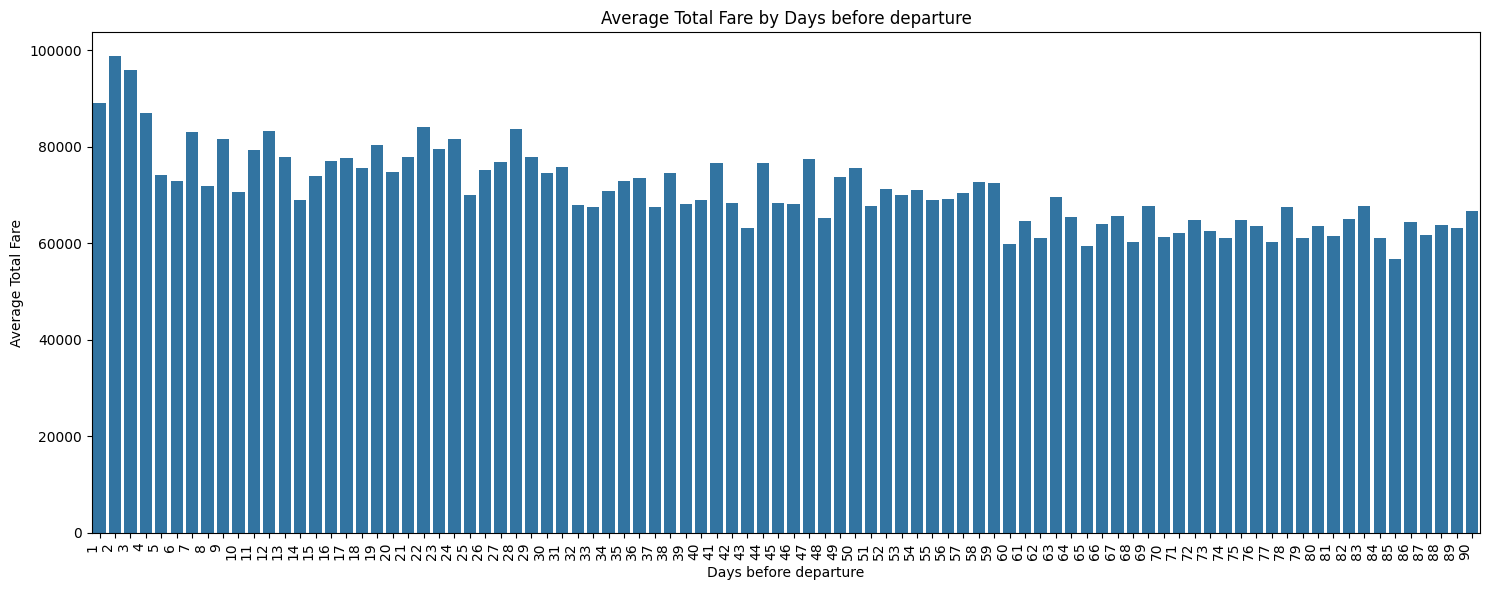

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and already loaded

# Group data by seasonality and calculate the average total fare
seasonality_fare = df.groupby('Days Before Departure')['Total Fare (BDT)'].mean().reset_index()
seasonality_fare

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.barplot(x='Days Before Departure', y='Total Fare (BDT)', data=seasonality_fare)
plt.title('Average Total Fare by Days before departure')
plt.xlabel('Days before departure')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Bar plot has been plotted between “Days before departure” and “Average Total Fare” and it has been found out that the price is higher before 4 days of departure.  Beyond that it is almost the same.  So, it makes sense to plan ahead atleast before 5 days and book the tickets.

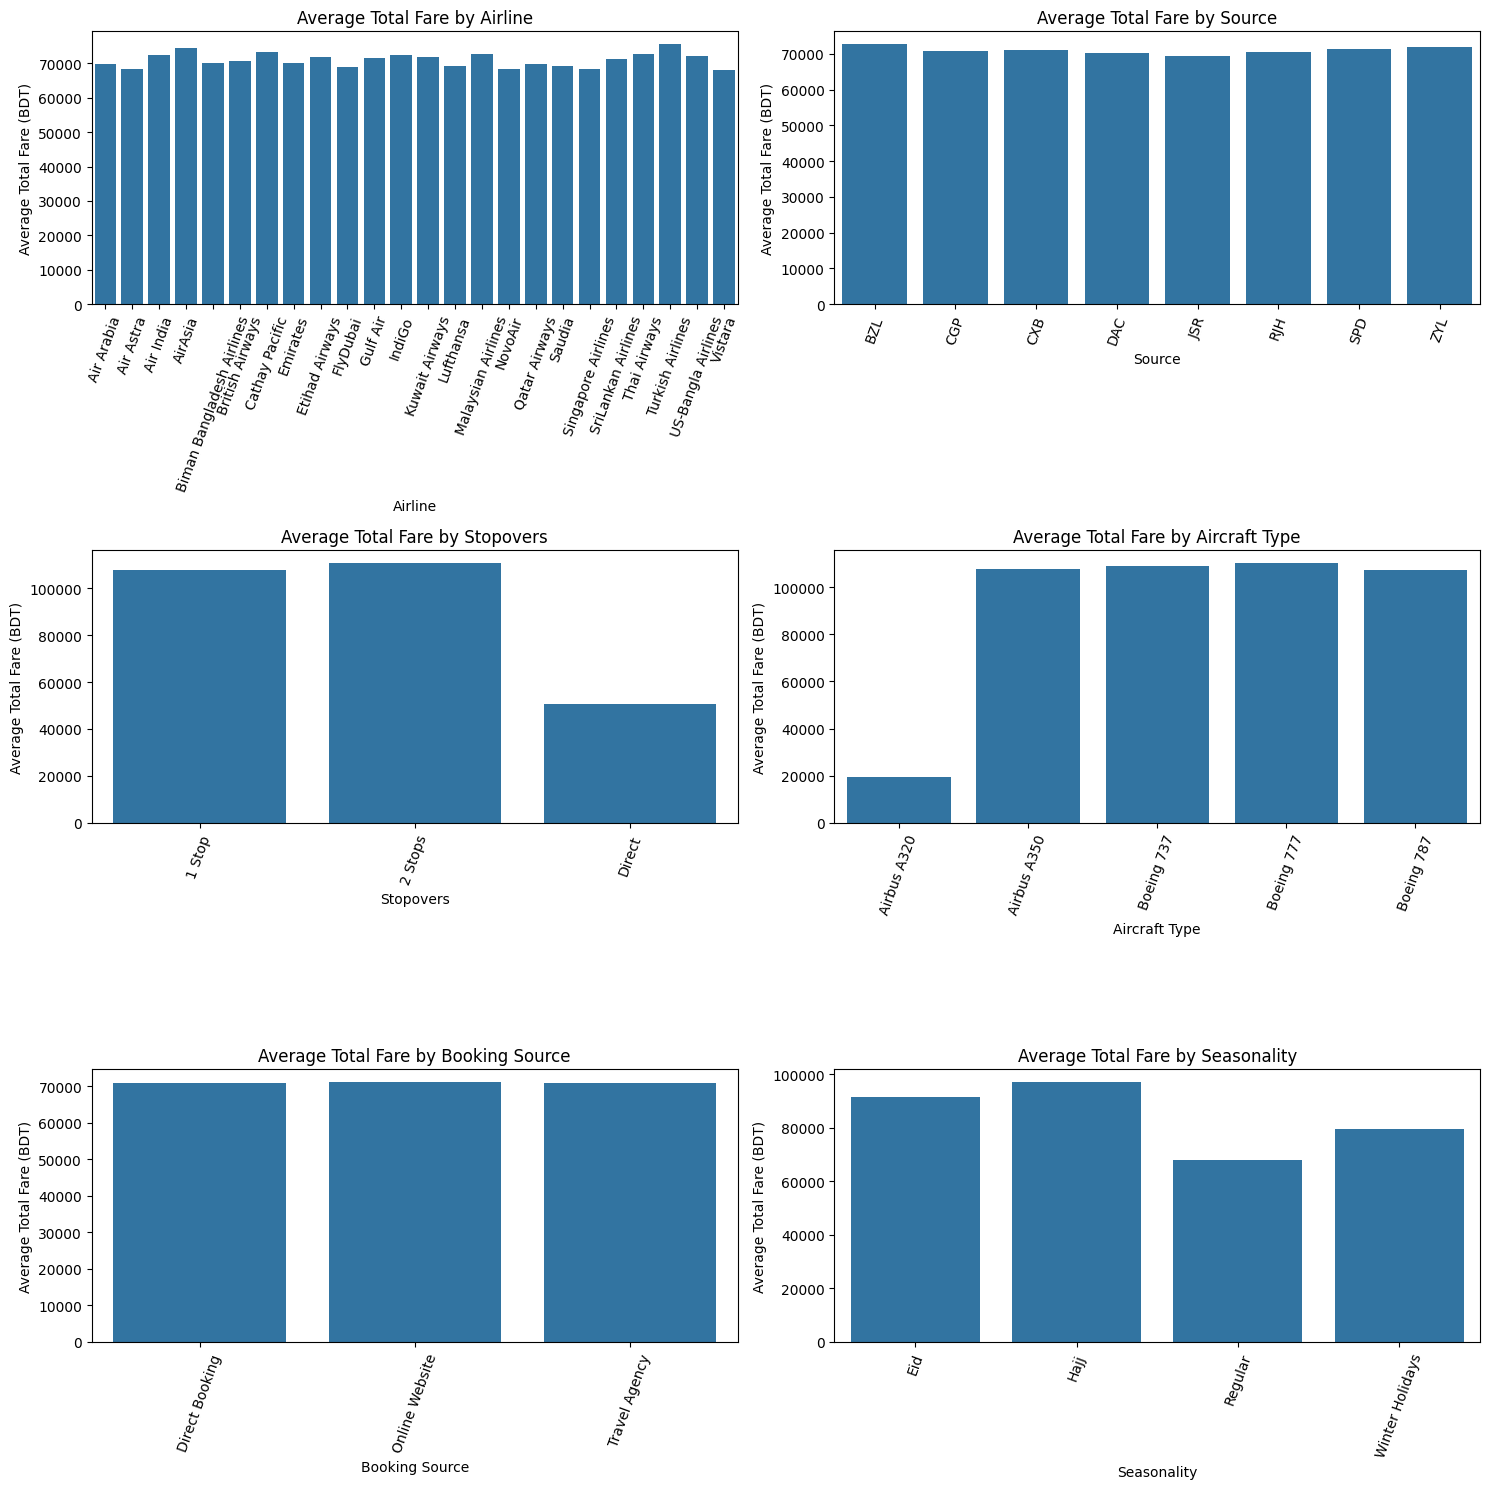

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and already loaded

columns = ['Airline', 'Source', 'Stopovers', 'Aircraft Type', 'Booking Source', 'Seasonality']

# Calculate the number of rows and columns for subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = int(len(columns) / num_cols) + (len(columns) % num_cols > 0)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Iterate through columns and create subplots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]  # Get the current subplot axes

    # Group data and calculate average fare
    column_fare = df.groupby(column)['Total Fare (BDT)'].mean().reset_index()  # Corrected column name

    # Create the bar plot
    sns.barplot(x=column, y='Total Fare (BDT)', data=column_fare, ax=ax)  # Corrected column name
    ax.set_title(f'Average Total Fare by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Average Total Fare (BDT)')  # Corrected column name
    ax.tick_params(axis='x', rotation=70, labelsize=10)  # Adjust label size and rotation

plt.tight_layout()
plt.show()

Various bar plots have been plotted and there is no significant difference between the airlines or the source.    

It means that while booking tickets, there is no need to look for the different airlines for lower costs, however it makes sense to look for stopovers as direct flights and Airbus A320 type tend to have a lower cost.  

Seasonality plays a major role as during Hajj (Holy pilgrimage) and Eid (festival) times the costs are higher.

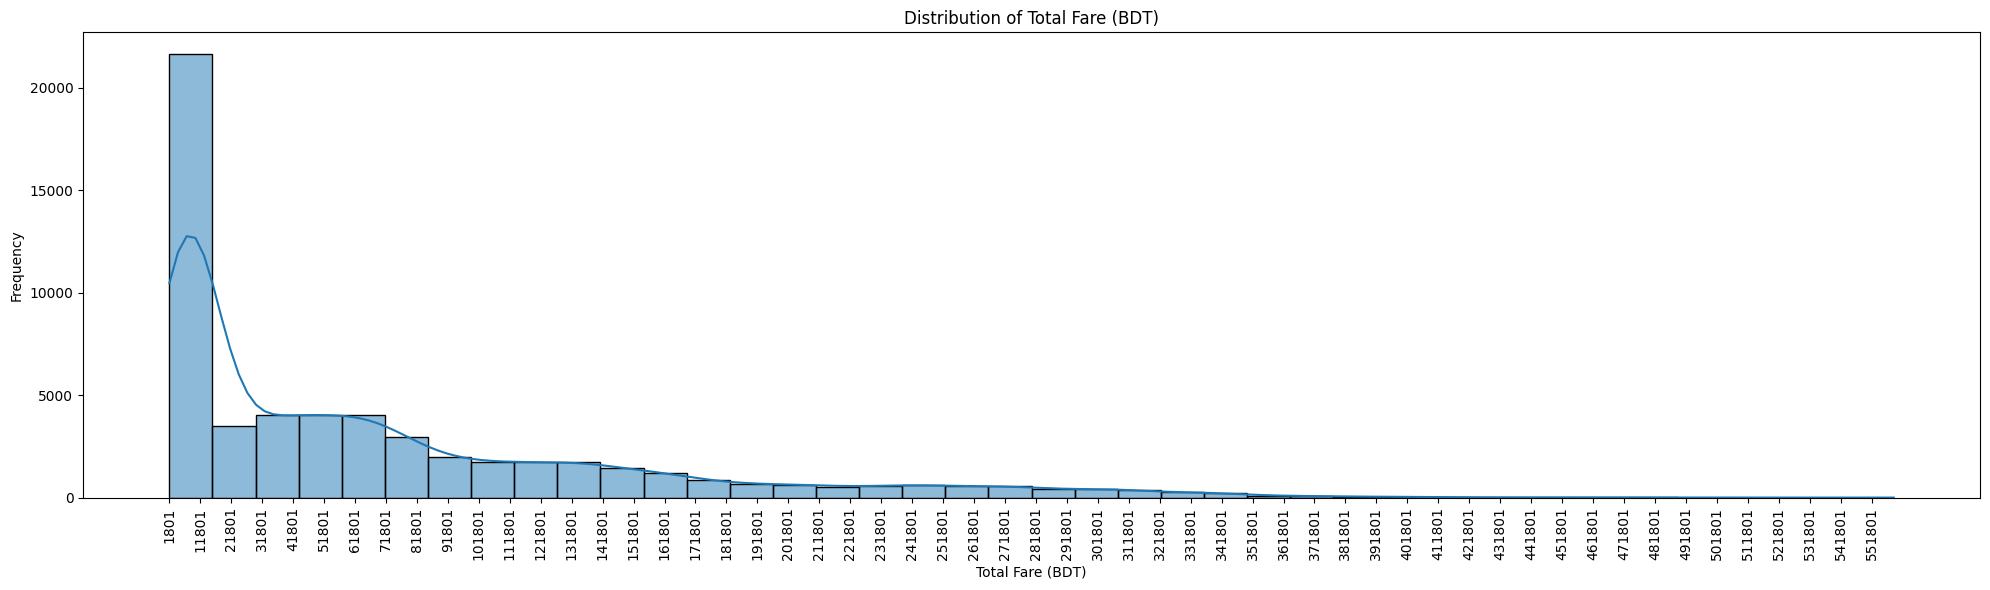

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your dataframe is named 'df' and already loaded

plt.figure(figsize=(20, 6))  # Adjust figure size as needed
# Increase x-axis markings
min_fare = df['Total Fare (BDT)'].min()
max_fare = df['Total Fare (BDT)'].max()
x_ticks = np.arange(min_fare, max_fare + 1, 10000)  # Adjust step (5000 here) as needed
plt.xticks(x_ticks, rotation=90)
sns.histplot(df['Total Fare (BDT)'], bins=  40, kde=True)  # Adjust bins and kde as needed
plt.title('Distribution of Total Fare (BDT)')
plt.xlabel('Total Fare (BDT)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

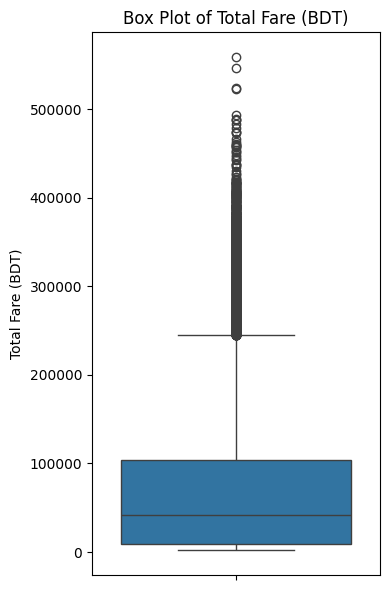

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and already loaded

plt.figure(figsize=(4, 6))  # Adjust figure size as needed
sns.boxplot(y=df['Total Fare (BDT)'])  # Use 'y' to create a vertical box plot
plt.title('Box Plot of Total Fare (BDT)')
plt.ylabel('Total Fare (BDT)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming your dataframe is named 'df' and already loaded

# Calculate quantiles and IQR
Q1 = df['Total Fare (BDT)'].quantile(0.25)
Q3 = df['Total Fare (BDT)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[df['Total Fare (BDT)'] <= upper_bound]

# Now df_filtered contains the data without outliers above the upper whisker



In [ ]:
print ("Number of rows present in original dataframe", df.shape[0])
print ("Number of rows present after dropping the outliers based on the Total fare ", df_filtered.shape[0])

Number of rows present in original dataframe 57000
Number of rows present after dropping the outliers based on the Total fare  53591


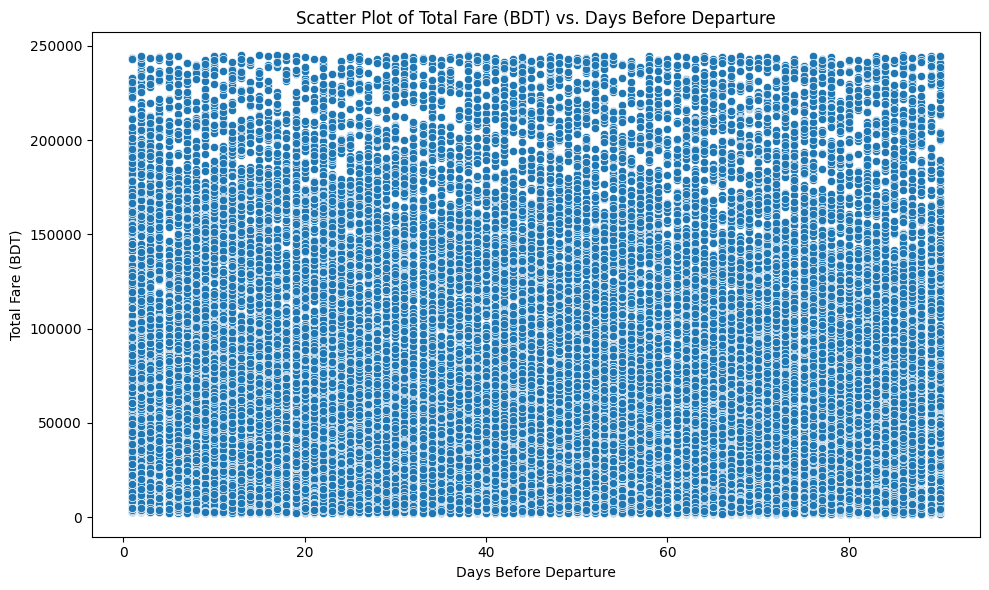

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and already loaded

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Days Before Departure', y='Total Fare (BDT)', data=df_filtered)
plt.title('Scatter Plot of Total Fare (BDT) vs. Days Before Departure')
plt.xlabel('Days Before Departure')
plt.ylabel('Total Fare (BDT)')
plt.tight_layout()
plt.show()

Scatter plot of total fare and days before departure and it shows no pattern, except for the one which we discussed earlier which is it is better to book atleast before 5 days of departure.

# Dataset Processing

Converting the categorical variables to numerical by using OneHotEncoder technique from scikitlearn

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# The columns you want to encode
columns = ['Airline', 'Source', 'Destination', 'Stopovers',
           'Aircraft Type', 'Class', 'Booking Source', 'Seasonality']

# Create a copy to keep original columns
df_encoded = df_filtered.copy()

# Fill missing values in selected columns
df_encoded[columns] = df_encoded[columns].fillna('Unknown')

# Create the OneHotEncoder instance
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the selected columns
encoded_array = ohe.fit_transform(df_encoded[columns])

# Get new column names from the encoder
encoded_col_names = ohe.get_feature_names_out(columns)

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df_encoded.index)

# Concatenate the original + encoded columns
final_df = pd.concat([df_encoded, encoded_df], axis=1)

# Optionally, drop the original columns (if you don’t need them anymore)
# final_df = final_df.drop(columns=columns)

# Preview the result
print(final_df.columns)


Index(['Airline', 'Source', 'Source Name', 'Destination', 'Destination Name',
       'Departure Date & Time', 'Arrival Date & Time', 'Duration (hrs)',
       'Stopovers', 'Aircraft Type', 'Class', 'Booking Source',
       'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)',
       'Seasonality', 'Days Before Departure', 'Airline_Air Arabia',
       'Airline_Air Astra', 'Airline_Air India', 'Airline_AirAsia',
       'Airline_Biman Bangladesh Airlines', 'Airline_British Airways',
       'Airline_Cathay Pacific', 'Airline_Emirates', 'Airline_Etihad Airways',
       'Airline_FlyDubai', 'Airline_Gulf Air', 'Airline_IndiGo',
       'Airline_Kuwait Airways', 'Airline_Lufthansa',
       'Airline_Malaysian Airlines', 'Airline_NovoAir',
       'Airline_Qatar Airways', 'Airline_Saudia', 'Airline_Singapore Airlines',
       'Airline_SriLankan Airlines', 'Airline_Thai Airways',
       'Airline_Turkish Airlines', 'Airline_US-Bangla Airlines',
       'Airline_Vistara', 'Source_BZL', 'Sourc

# Model Building - SVM


The dataset is scaled using standardscaler and split to train and test in the ratio of 80:20.  
Building an initial SVM regression model and evaluating the accuracy on test dataset.  
Radial Basis Function has been used as the data has a non-linear relationship between features and target and we want the model to be flexible and capture complex patterns.  


In [ ]:
from sklearn.model_selection import train_test_split

#final_df.columns
input_df=final_df[encoded_col_names]
X_train, X_test, y_train, y_test = train_test_split(input_df, final_df['Total Fare (BDT)'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import median_absolute_error,r2_score
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:


# Initialize and fit the SVR model
svr = SVR(kernel='rbf', C=50, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Calculate R² score and Median Absolute Error
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Print the results
print("📈 R² Score on Test Set for Support Vector model", r2)
print("📉 Median Absolute Error for Support Vector model", medae)

📈 R² Score on Test Set: 0.176320141049371
📉 Median Absolute Error on Test Set: 9856.716019732601


# Model Building - ANN

An ANN model has been built using Keras library and the model metrics are evaluated

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer (1 unit for regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Evaluate the model using R-squared and Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error for ANN model: {mse}')
print(f'R-squared for ANN model: {r2}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6140737536.0000 - val_loss: 4443015680.0000
Epoch 2/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1816912384.0000 - val_loss: 3678214144.0000
Epoch 3/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1329366528.0000 - val_loss: 3446003712.0000
Epoch 4/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1221165696.0000 - val_loss: 3342387200.0000
Epoch 5/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1190840832.0000 - val_loss: 3268821248.0000
Epoch 6/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1172712320.0000 - val_loss: 3242032896.0000
Epoch 7/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1166672384.0000 - val_loss: 3158121216.0000
Epoch 8/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1160975744.0000 - val_loss: 3154522112.0000
Epoch 9/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1166945536.0000 - val_loss: 3120114944.0000
Epoch 10/100
1340/1340 ━━━━━━━━━━━━━━

# Model Building - RandomForest Regressor

Builing a RandomForest Regressor model and evaluating the accuracy on test dataset.  


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Create and train the model
modelRF = RandomForestRegressor(random_state=42)
modelRF.fit(X_train_scaled, y_train)

# Make predictions
y_predRF = modelRF.predict(X_test_scaled)

# Evaluate the model
mseRF = mean_squared_error(y_test, y_predRF)
r2RF = r2_score(y_test, y_predRF)

print(f"Mean Squared Error for Random Forest regressor: {mseRF}")
print(f"R-squared for Random Forest regressor: {r2RF}")

Mean Squared Error: 1314447274.571766
R-squared: 0.6220964104213969


# Evaluating the effect of PCA on ANN model

As noted from the previous results, ANN model has higher accuracy when compared to RandomForest or SVM model.
Evaluating how the Principal Component Analysis affects the accuracy of the model.


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Build the ANN model
modelpcaann = Sequential()

# Add input layer and first hidden layer
modelpcaann.add(Dense(units=64, activation='relu', input_dim=X_train_pca.shape[1]))

# Add second hidden layer
modelpcaann.add(Dense(units=32, activation='relu'))

# Add output layer (1 unit for regression)
modelpcaann.add(Dense(units=1))

# Compile the model
modelpcaann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = modelpcaann.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test))

# Predict using the trained model
y_predpcaann = modelpcaann.predict(X_test_pca)

# Evaluate the model using R-squared and Mean Squared Error
msepcaann = mean_squared_error(y_test, y_predpcaann)
r2pcaann = r2_score(y_test, y_predpcaann)
print(f'Mean Squared Error for ANN pca model: {msepcaann}')
print(f'R-squared for ANN pca model: {r2pcaann}')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6622573056.0000 - val_loss: 3506423296.0000
Epoch 2/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2861582336.0000 - val_loss: 2191334144.0000
Epoch 3/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2125447936.0000 - val_loss: 2146681728.0000
Epoch 4/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2139602816.0000 - val_loss: 2126923520.0000
Epoch 5/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2120306560.0000 - val_loss: 2122305152.0000
Epoch 6/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2079242112.0000 - val_loss: 2113456128.0000
Epoch 7/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2097245568.0000 - val_loss: 2109543552.0000
Epoch 8/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2059864320.0000 - val_loss: 2103863936.0000
Epoch 9/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2056391424.0000 - val_loss: 2100373888.0000
Epoch 10/100
1340/1340 ━━━━━━━━━━━━━━

# Evaluating the effect of ANOVA F-test on ANN model

ANOVA F-tests (Analysis of Variance) are used to determine whether there are statistically significant differences between the means of two or more groups.   
It helps to answer, does the categorical features have a significant effect on a numerical outcome.  
As we have categorical features, we are trying to find out the top categorical features which have more f value and eliminate the rest of them.  
After elimination, building an ANN model and find out, how much Anova F-test helps in improving the accuracy.


In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.compose import ColumnTransformer

# ANOVA F-test for regression
f_values, p_values = f_regression(input_df, final_df['Total Fare (BDT)'])

# Combine results into a DataFrame
anova_results = pd.DataFrame({
    'Feature': encoded_col_names,
    'F-value': f_values,
    'P-value': p_values
}).sort_values(by='F-value', ascending=False)
import pandas as pd

# Set display option to show all rows
#pd.set_option('display.max_rows', None)

# Optional: also show all columns
#pd.set_option('display.max_columns', None)

print(anova_results)

                              Feature       F-value        P-value
55          Aircraft Type_Airbus A320  30314.745334   0.000000e+00
54                   Stopovers_Direct   9364.815438   0.000000e+00
52                   Stopovers_1 Stop   7063.925323   0.000000e+00
61                      Class_Economy   6700.954681   0.000000e+00
62                  Class_First Class   4410.876089   0.000000e+00
59           Aircraft Type_Boeing 787   2952.492302   0.000000e+00
57           Aircraft Type_Boeing 737   2815.356927   0.000000e+00
58           Aircraft Type_Boeing 777   2466.518601   0.000000e+00
56          Aircraft Type_Airbus A350   2234.192128   0.000000e+00
51                    Destination_ZYL   2000.086247   0.000000e+00
36                    Destination_CXB   1975.179539   0.000000e+00
49                    Destination_SPD   1959.109572   0.000000e+00
47                    Destination_RJH   1957.215576   0.000000e+00
33                    Destination_BZL   1953.128306   0.000000

In [ ]:
from sklearn.model_selection import train_test_split

#final_df.columns
input_df_anova=final_df[filtered_results['Feature']]
X_trainanova, X_testanova, y_trainanova, y_testanova = train_test_split(input_df_anova, final_df['Total Fare (BDT)'], test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaledanova = scaler.fit_transform(X_trainanova)
X_test_scaledanova = scaler.transform(X_testanova)

# Build the ANN model
modelanova = Sequential()

# Add input layer and first hidden layer
modelanova.add(Dense(units=64, activation='relu', input_dim=X_train_scaledanova.shape[1]))

# Add second hidden layer
modelanova.add(Dense(units=32, activation='relu'))

# Add output layer (1 unit for regression)
modelanova.add(Dense(units=1))

# Compile the model
modelanova.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
historyanova = modelanova.fit(X_train_scaledanova, y_trainanova, epochs=100, batch_size=32, validation_data=(X_testanova, y_testanova))

# Predict using the trained model
y_predanova = modelanova.predict(X_test_scaledanova)

# Evaluate the model using R-squared and Mean Squared Error
mseanova = mean_squared_error(y_testanova, y_predanova)
r2anova = r2_score(y_test, y_predanova)

print(f'Mean Squared Error for anova ANN model: {mseanova}')
print(f'R-squared for anova ANN model: {r2anova}')


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6336450560.0000 - val_loss: 4488613888.0000
Epoch 2/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1717547008.0000 - val_loss: 3638766592.0000
Epoch 3/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1247340288.0000 - val_loss: 3518160640.0000
Epoch 4/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1169449344.0000 - val_loss: 3515910912.0000
Epoch 5/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1162294912.0000 - val_loss: 3490809344.0000
Epoch 6/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1148445312.0000 - val_loss: 3528222464.0000
Epoch 7/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1161295360.0000 - val_loss: 3487544832.0000
Epoch 8/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1154950528.0000 - val_loss: 3518921984.0000
Epoch 9/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1148455424.0000 - val_loss: 3543012608.0000
Epoch 10/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3m

# Evaluating model metrics

SVM regression model scores  

R² Score on Test Set: 0.176320141049371  
Median Absolute Error on Test Set: 9856.716019732601

ANN model using Keras library scores  

Mean Squared Error: 1127155456.0  
R-squared: 0.6759427785873413  

RandomForest Regressor model and its scores  

Mean Squared Error: 1314447274.571766  
R-squared: 0.6220964104213969  

A total of 3 models has been built and it has been found out that the ANN model has the highest R squared score and lowest MSE.  The worst performing model was SVM.  

Additionally, PCA and ANOVA F-test has also been done and tried to eliminate the features which contributed the lowest.  However, comparing the scores it has been found out that there is no major difference in running PCA and ANOVA F-test feature elimination.  

Mean Squared Error: 1127155456.0  
R-squared: 0.6759427785873413  


# Conclusion

A total of 3 models using SVM, ANN and Decision tree algorithms has been built, and it has been found out that the ANN model has the highest R squared score and lowest MSE.  Additionally, PCA and ANOVA F-tests have also been done and tried to eliminate the features which contributed the lowest.  The ANN has model has been run on that data.  

However, comparing the scores it has been found out that there is no major difference in running PCA and ANOVA F-test feature elimination.  

The following is the best score of ANN model,  
Mean Squared Error: 1127155456.0  
R-squared: 0.6759427785873413
